<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Tema3_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tema 3.2. Desestacionalización (I)
Leer las diapositivas disponibles en el Aula Virtual antes de ejecutar este código.

In [ ]:
# Paso preliminar: instalar la última versión de statsmodels, que en colab no está por defecto bien actualizada (al menos a fecha de hoy 20/10/21)
!pip install statsmodels==0.13.0 # current stable version
# Como se indica en el mensaje, a que clicar en RESTAT RUNTIME

In [ ]:
#Importamos algunas librerías y datos
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
series = pd.read_csv('https://raw.githubusercontent.com/otoperalias/Coyuntura/main/clases/datos/airline-passengers.csv', header=0, index_col=0, parse_dates=True)
series

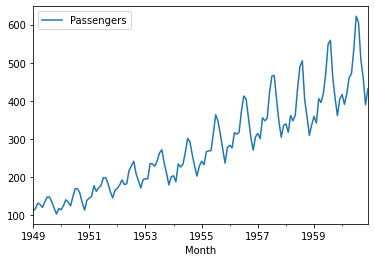

In [68]:
# Representar la serie
series.plot()

#### Descomposición clásica

In [ ]:
# Ejemplo descomposición aditiva
result_ad = sm.tsa.seasonal_decompose(series, model="additive")
result_ad.plot()
plt.show()

In [ ]:
# Ejemplo de descomposición multiplicativa
result = sm.tsa.seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()

#### Descomposición STL

In [ ]:
# Echar un vistazo a la página de ayuda:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.STL.html#statsmodels.tsa.seasonal.STL

#Ahora aplicamos el nuevo método a la serie de pasajeros de aerolíneas
result = sm.tsa.STL(series).fit() 
result.plot()

In [ ]:
# Para reducir la influencia de los valores atípicos, se añade el argumento robust:
result = sm.tsa.STL(series, robust=True).fit() 
result.plot()

#### Material adicional:

Para profundizar en vuestros conocimientos, echad un vistazo a este gran recurso disponible en la web:  
http://www.chadfulton.com/topics/002-seasonal-adjustment.html

#### Ejemplo con datos de afiliaciones a la Seguridad Social

Fuente:  
https://www.seg-social.es/wps/portal/wss/internet/EstadisticasPresupuestosEstudios/Estadisticas/EST8/2341/2342

Los datos a usar están disponibles aquí:  
https://github.com/otoperalias/Coyuntura/blob/main/clases/datos/series_seg_social.xlsx  
Se pueden importar directamente, sin necesidad de descargarlos en vuestro equipo. Para ello, debéis usar este enlace:  
https://raw.githubusercontent.com/otoperalias/Coyuntura/main/clases/datos/series_seg_social.xlsx  
No obstante, la primera que lo uséis es bueno descargar el archivo y echar un vistazo a los datos y así, entre otras cosas, ver si hay alguna columna para usar como index de la tabla, si esa columna se puede interpretar como fechas por ```pandas```, etc..


In [ ]:
# Importamos los datos
ss=pd.read_excel(...

In [ ]:
# Descomposición clásica aditiva

In [ ]:
# Descomposición clásica multiplicativa

In [ ]:
# Descomposición STL